## Here I am going to work on the digits data set and explore how different kernels and Gamma values for SVM affects the dataset

### Desciption of Gamma Values

The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

### How Regularisation (C) affects the SVM

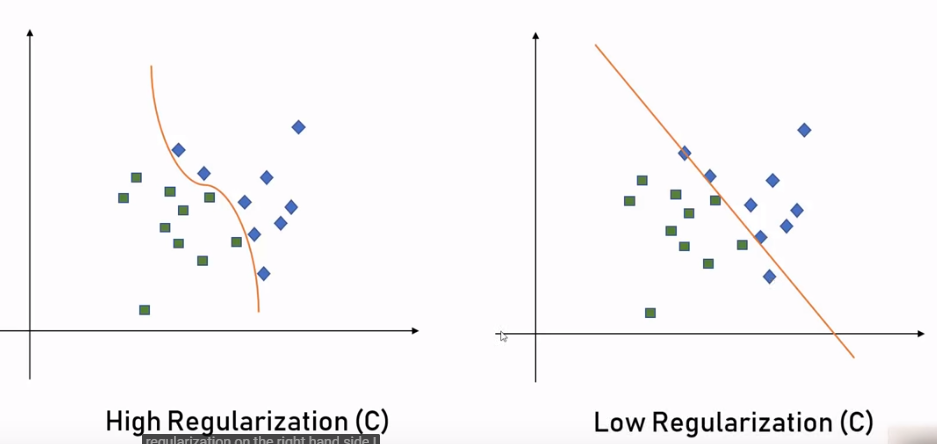


In [1]:
from sklearn.datasets import load_digits


In [2]:
import pandas as pd
df = load_digits()

In [3]:
dir(df)

['DESCR', 'data', 'images', 'target', 'target_names']

In [35]:
df.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
digits = pd.DataFrame(df.data)
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [18]:
len(df.target)

1797

In [10]:
df.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
df.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X = digits
y = df.target

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [43]:
from sklearn.svm import SVC
model = SVC(gamma=1)

Here we use SVM with the default parameters and see what the result is like before we change any parameters

In [44]:
model.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
df.target[450]

4

In [34]:
import numpy as np
model.predict([df.data[450]])

array([4])

In [45]:
model.score(X_test,y_test)

0.08888888888888889

A very low score indicates a possible overfitting situation, hence we would want to reduce the gamma to reduce the complexity

Now, we will decrease the gamma to 0.01 to see if we can simplify the model and reduce overfitting

In [46]:
model = SVC(gamma=0.01)
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
model.score(X_test,y_test)

0.8194444444444444

The score has improed by 10-fold which is a huge improvement, but lets tinker with the regularisation value to see if we can further improve the score

In [49]:
model = SVC(gamma=0.01, kernel='poly')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
model.score(X_test,y_test)

0.9916666666666667

Here we achieve a very near perfect score as we have used the kernel polynomial is suitable for image processing